## Подключение библиотек

In [189]:
import os
import sys
import yfinance as yf
import pandas as pd
import numpy as np
import backtrader as bt
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr
%matplotlib inline

## Загрузка датафрейма акций Microsoft

In [190]:
yf.pdr_override()

# скачиваю датафрейм
df = pdr.get_data_yahoo("MSFT", start="2015-01-01", end="2019-12-31")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,41.587284,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.864841,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.479866,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.871037,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,41.390320,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,42.607944,29645200
2015-01-09,47.610001,47.820000,46.900002,47.189999,42.249817,23944200
2015-01-12,47.419998,47.540001,46.360001,46.599998,41.721588,23651900
2015-01-13,46.970001,47.910000,46.060001,46.360001,41.506714,35270600


## Cкользящая средняя
![SMA-1.png](img/SMA-1.png)

где SMAt – значение простого скользящего среднего в период времени t;

n – интервал сглаживания;

Pt-i – значение случайной величины на момент (t-i).

In [191]:
#скользящая средняя
def moving_average(df, n): 
    MA = pd.Series(df['Close'].rolling(window=n).mean())
    return MA

## Построение графика средней скользащей

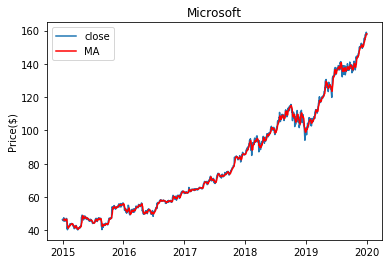

In [192]:
df['MA'] = moving_average(df, 5)
plt.plot(df.index,df['Close'], label='close')
plt.plot(df.index,df['MA'],label='MA', color = 'red')
plt.legend()
plt.title('Microsoft')
plt.ylabel('Price($)')
plt.show()

## RSI
![RSI-formula.png](img/RSI-formula.png)

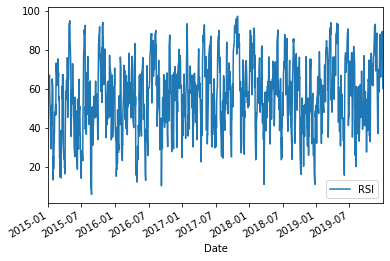

In [193]:
def RSI(series, n):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n] ) 
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n] ) 
    d = d.drop(d.index[:(n-1)])
    rs = pd.Series.ewm(u, com=n-1, adjust=False).mean()  / pd.Series.ewm(d, com=n-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)
df['RSI'] = RSI(df.Close, 5)
df.plot(y=['RSI'])

## Стохастический осциллятор
![stochastic-1.png](img/stochastic-1.png)

где N – количество периодов;

Ct – цена закрытия в период времени t;

HN – максимальное значение цены за последние N периодов;

LN – минимальное значение цены за последние N периодов.

Формула расчета %D в период времени t представляет собой простое скользящее среднее %K с интервалом сглаживания m.

![stochastic-2.png](img/stochastic-2.png)

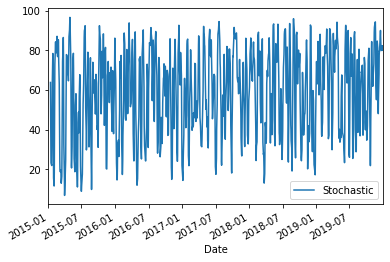

In [194]:
#Стохастик индикатор

def stochastic_oscillator(Close, Low, High, n, k):
    SOk = ((Close-pd.Series(Low.rolling(window = n).min())) / (pd.Series(High.rolling(window = n).max()) - pd.Series(Low.rolling(window = n).min()))) * 100
    SOk = pd.Series(SOk.rolling(window = k).mean())
    SOd = pd.Series(SOk.rolling(window = k).mean())
    return SOd
df['Stochastic'] = stochastic_oscillator(df['Close'],df['Low'],df['High'], 5, 3)
df.plot(y=['Stochastic'])

In [195]:
close_group = df['Close']

# применяю lambda функцию, которая возвращает -1 при отрицательном занчении, 0 при равном, 1 при положительном
close_group = close_group.transform(lambda x : np.sign(x.diff()))

df['Prediction'] = close_group

# равные дни приравниваем к положительным
df.loc[df['Prediction'] == 0.0, 'Prediction'] = 1.0

df.tail(50)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sign
  after removing the cwd from sys.path.


,Open,High,Low,Close,Adj Close,Volume,MA,RSI,Stochastic,Prediction
Date,,,,,,,,,,
2019-10-18,139.759995,140.000000,136.559998,137.410004,136.570984,32273500,139.726004,35.871017,56.799425,-1.0
2019-10-21,138.449997,138.500000,137.009995,138.429993,137.584747,20078200,139.502002,45.851310,39.810423,1.0
2019-10-22,138.970001,140.009995,136.259995,136.369995,135.537338,27431000,138.462000,32.918130,25.754713,-1.0
2019-10-23,136.880005,137.449997,135.610001,137.240005,136.402039,29844600,137.828000,41.612554,21.808571,1.0
2019-10-24,139.389999,140.419998,138.669998,139.940002,139.085556,37029300,137.878000,61.147237,26.698834,1.0
2019-10-25,139.339996,141.139999,139.199997,140.729996,139.870712,25959700,138.541998,65.383129,44.090208,1.0
2019-10-28,144.399994,145.669998,143.509995,144.190002,143.309601,35280100,139.694000,78.322174,66.529414,1.0
2019-10-29,144.080002,144.500000,142.649994,142.830002,141.957901,20589500,140.986002,66.170148,80.911159,-1.0
2019-10-30,143.520004,145.000000,142.789993,144.610001,143.727036,18496600,142.460001,73.018935,84.383718,1.0


### Удаляю строки с пустыми значениями

In [196]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA,RSI,Stochastic,Prediction
Date,,,,,,,,,,
2015-01-13,46.970001,47.910000,46.060001,46.360001,41.506714,35270600,46.793999,42.852043,63.766941,-1.0
2015-01-14,45.959999,46.240002,45.619999,45.959999,41.148579,29719600,46.739999,36.131851,52.056565,-1.0
2015-01-15,46.220001,46.380001,45.410000,45.480000,40.718842,32750800,46.317999,29.251027,34.287287,-1.0
2015-01-16,45.310001,46.279999,45.169998,46.240002,41.399284,35695300,46.128000,48.617465,23.192538,1.0
2015-01-20,46.299999,46.650002,45.570000,46.389999,41.533566,36161900,46.086000,51.867920,21.852516,1.0
2015-01-21,45.939999,46.139999,45.480000,45.919998,41.112770,39081100,45.998000,41.568414,30.814158,-1.0
2015-01-22,46.380001,47.139999,46.080002,47.130001,42.196106,35898000,46.232000,64.349698,46.146964,1.0
2015-01-23,47.360001,47.389999,46.799999,47.180000,42.240868,26211600,46.572000,65.053454,63.294949,1.0
2015-01-26,47.000000,47.130001,46.240002,47.009998,42.088665,42525500,46.725999,60.017978,78.393325,-1.0


### Разделяю датафрейм на тренировочное и тестовое мн-ва

In [197]:
X = df[['Close', 'MA','RSI','Stochastic']]
Y = df['Prediction']
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, shuffle = False)


## Random forest

In [198]:
rand_fr = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)
rand_fr.fit(xTrain, yTrain)
y_pred = rand_fr.predict(xTest)

# accuracy
print('Correct Prediction (%): ', accuracy_score(yTest, y_pred, normalize = True) * 100.0)

Correct Prediction (%):  76.4


## SVC

In [199]:
clf = SVC(kernel='linear', C=1)
clf.fit(xTrain, yTrain)
y_pred1 = clf.predict(xTest)

print('Correct Prediction (%): ', accuracy_score(yTest, y_pred1, normalize = True) * 100.0)

Correct Prediction (%):  80.4


### Создаю новый датафрейм для тестирования

In [200]:

df['y_pred1'] = np.NaN
df.iloc[(len(df) - len(y_pred)):, -1] = y_pred1

df1 = pd.DataFrame(index = df.index) 
df1['Open'] = df['Open'].values      
df1['High'] = df['High'].values      
df1['Low'] = df['Low'].values
df1['Close'] = df['Close'].values
df1['Volume'] = df['Volume'].values
df1['openinterest'] = df['y_pred1'].values
df1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Open,High,Low,Close,Volume,openinterest
Date,,,,,,
2015-01-13,46.970001,47.910000,46.060001,46.360001,35270600,NaN
2015-01-14,45.959999,46.240002,45.619999,45.959999,29719600,NaN
2015-01-15,46.220001,46.380001,45.410000,45.480000,32750800,NaN
2015-01-16,45.310001,46.279999,45.169998,46.240002,35695300,NaN
2015-01-20,46.299999,46.650002,45.570000,46.389999,36161900,NaN
2015-01-21,45.939999,46.139999,45.480000,45.919998,39081100,NaN
2015-01-22,46.380001,47.139999,46.080002,47.130001,35898000,NaN
2015-01-23,47.360001,47.389999,46.799999,47.180000,26211600,NaN
2015-01-26,47.000000,47.130001,46.240002,47.009998,42525500,NaN


### Очистка датафрейма от строк без предсказания

In [201]:
clean_df1 = df1[np.isfinite(df1['openinterest'])]
clean_df1

,Open,High,Low,Close,Volume,openinterest
Date,,,,,,
2019-01-03,100.099998,100.190002,97.199997,97.400002,42579100,-1.0
2019-01-04,99.720001,102.510002,98.930000,101.930000,44060600,1.0
2019-01-07,101.639999,103.269997,100.980003,102.059998,35656100,1.0
2019-01-08,103.040001,103.970001,101.709999,102.800003,31514400,1.0
2019-01-09,103.860001,104.879997,103.239998,104.269997,32280800,1.0
2019-01-10,103.220001,103.750000,102.379997,103.599998,30067600,-1.0
2019-01-11,103.190002,103.440002,101.639999,102.800003,28314200,-1.0
2019-01-14,101.900002,102.870003,101.260002,102.050003,28437100,-1.0
2019-01-15,102.510002,105.050003,101.879997,105.010002,31587600,1.0


## Создание стратегии для торговли

In [202]:
# Create a Strategy
class RF_Signal(bt.Strategy):

    def log(self, txt, dt = None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.datasignal = self.datas[0].openinterest
        
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None
                
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY ORDER EXECUTED, Price: %.2f, Cost: %.2f, Commission: %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL ORDER EXECUTED, Price: %.2f, Cost: %.2f, Commission: %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATING PROFIT, GROSS: %.2f, NET: %.2f' % (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])
        self.log('y_pred, %.2f' % self.datasignal[0])
        
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if y_pred > 0
            if self.datasignal[0] > 0:
                # BUY
                self.log('BUY ORDER CREATED, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
        else:
            # sell if y_pred < 0
            if self.datasignal[0] < 0:
                # SELL
                self.log('SELL ORDER CREATED, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


### Добавление TradeAnalyzer

In [203]:
def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    #Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = round((total_won / total_closed) * 100, 2)
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))

## Запуск теста

Starting Portfolio Value: 1000000.00
2019-01-03, Close, 97.40
2019-01-03, y_pred, -1.00
2019-01-04, Close, 101.93
2019-01-04, y_pred, 1.00
2019-01-04, BUY ORDER CREATED, 101.93
2019-01-07, BUY ORDER EXECUTED, Price: 101.64, Cost: 10164.00, Commission: 10.16
2019-01-07, Close, 102.06
2019-01-07, y_pred, 1.00
2019-01-08, Close, 102.80
2019-01-08, y_pred, 1.00
2019-01-09, Close, 104.27
2019-01-09, y_pred, 1.00
2019-01-10, Close, 103.60
2019-01-10, y_pred, -1.00
2019-01-10, SELL ORDER CREATED, 103.60
2019-01-11, SELL ORDER EXECUTED, Price: 103.19, Cost: 10164.00, Commission: 10.32
2019-01-11, OPERATING PROFIT, GROSS: 155.00, NET: 134.52
2019-01-11, Close, 102.80
2019-01-11, y_pred, -1.00
2019-01-14, Close, 102.05
2019-01-14, y_pred, -1.00
2019-01-15, Close, 105.01
2019-01-15, y_pred, 1.00
2019-01-15, BUY ORDER CREATED, 105.01
2019-01-16, BUY ORDER EXECUTED, Price: 105.26, Cost: 10526.00, Commission: 10.53
2019-01-16, Close, 105.38
2019-01-16, y_pred, 1.00
2019-01-17, Close, 106.12
2019-01-

<IPython.core.display.Javascript object>


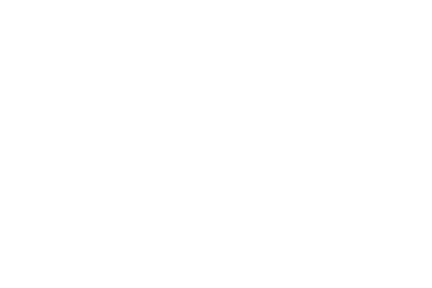

[[<Figure size 432x288 with 4 Axes>]]

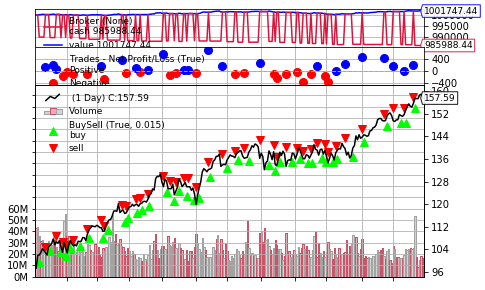

In [204]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(RF_Signal)

# Create a Data Feed
data = bt.feeds.PandasDirectData(dataname = clean_df1)
# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(1000000.0)

# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake = 100)

# Set the commission
cerebro.broker.setcommission(commission = 0.001)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())


# Analyzer
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = 'mySharpe')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name = 'myDrawDown')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='ta')

results = cerebro.run()
strat = results[0]

# Print out the final result
print('\nFinal Portfolio Value: %.2f' % cerebro.broker.getvalue())
##print('Sharpe Ratio:', strat.analyzers.mySharpe.get_analysis())
##print('Drawdown :', strat.analyzers.myDrawDown.get_analysis())

printTradeAnalysis(strat.analyzers.ta.get_analysis())

cerebro.plot(style='line')